<a href="https://colab.research.google.com/github/taranirashimtha/AI-honors-projects/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [4]:
# data collection adn processing
cardataset = pd.read_csv("/car data.csv")


In [6]:
cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
cardataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
cardataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# checking missing values
cardataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [12]:
print(cardataset.Fuel_Type.value_counts())
print(cardataset.Seller_Type.value_counts())
print(cardataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [15]:
# encoding data
cardataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cardataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
cardataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
# splitting data
x = cardataset.drop(['Car_Name','Selling_Price'],axis=1)
y = cardataset['Selling_Price']

In [19]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=2)


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
# model evaluation
training_data_prediction = lin_reg.predict(xtrain)
errorscore = metrics.r2_score(ytrain,training_data_prediction)
print("R squared error : ", errorscore)

R squared error :  0.8799451660493711


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

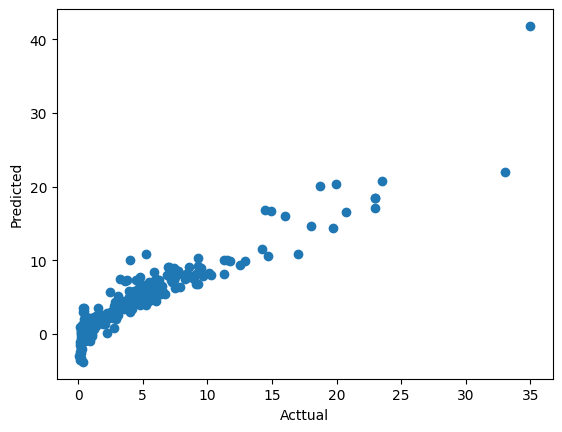

In [24]:
# visualise actual and predicted
plt.scatter(ytrain,training_data_prediction)
plt.xlabel("Acttual")
plt.ylabel("Predicted")
plt.label("Actual vs predicted prices")

In [26]:
test_data_prediction = lin_reg.predict(xtest)


In [27]:
error_score = metrics.r2_score(ytest,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8365766715027051


Text(0.5, 1.0, 'Actual vs predicted prices')

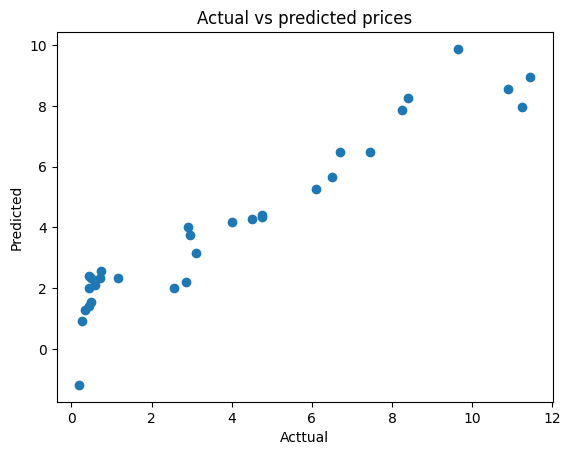

In [36]:
# visualise actual and predicted
plt.scatter(ytest,test_data_prediction)
plt.xlabel("Acttual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted prices")

In [31]:
# lasso regression
lasso_reg = Lasso()
lasso_reg.fit(xtrain,ytrain)

Lasso()

In [32]:
training_data_prediction = lasso_reg.predict(xtrain)
errorscore = metrics.r2_score(ytrain,training_data_prediction)
print("R squared error : ", errorscore)

R squared error :  0.8427856123435794


Text(0.5, 1.0, 'Actual vs predicted prices')

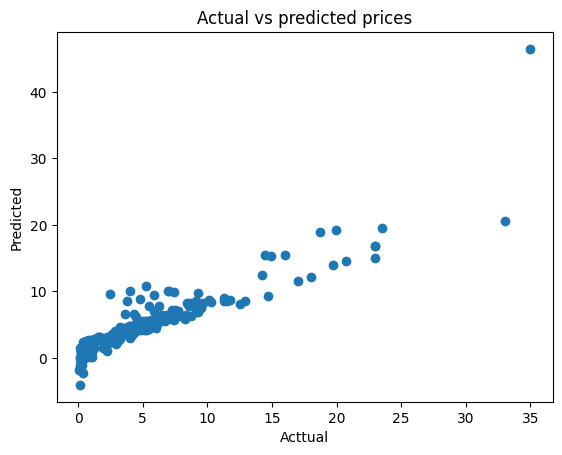

In [34]:
# visualise actual and predicted
plt.scatter(ytrain,training_data_prediction)
plt.xlabel("Acttual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted prices")

In [35]:
test_data_prediction = lasso_reg.predict(xtest)
error_score = metrics.r2_score(ytest,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


Text(0.5, 1.0, 'Actual vs predicted prices')

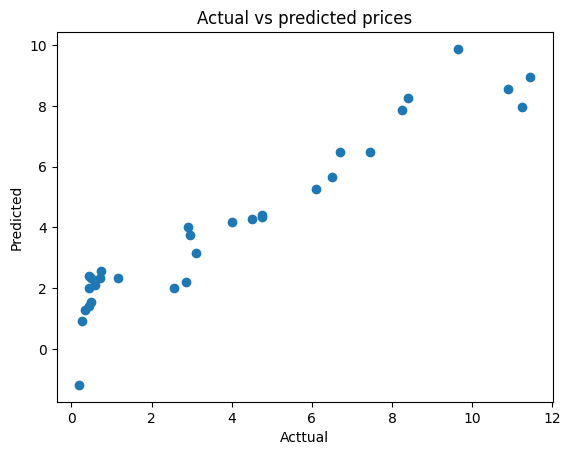

In [37]:
# visualise actual and predicted
plt.scatter(ytest,test_data_prediction)
plt.xlabel("Acttual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted prices")